In [1]:
import sys
sys.path.append('../sim')
import pandas as pd
import plotly.express as px

from network_sim import Simulation, NetworkNode

In [2]:
# Run the simulation without a hacked node
sim = Simulation('sim1')
node_dict = sim.establish_nodes(9)
sim.set_v1_structure()
uncompromised_results = sim.run_simulation(t=100)

In [3]:
# Run the simulation with node 0 hacked
sim = Simulation('sim2')
node_dict = sim.establish_nodes(9)
sim.set_v1_structure()

node0, ind = sim.get_node('node_0')
node0.is_compromised = 1
sim.modify_node(node0, ind)

compromised_results = sim.run_simulation(t=100)

In [4]:
df_c = pd.DataFrame(compromised_results['node_0'])
df_u = pd.DataFrame(uncompromised_results['node_0'])

print(len(df_c[df_c.flagged_malicious==True]))
print(len(df_u[df_u.flagged_malicious==True]))

96
14


In [5]:
df_c.head()

,time,packet_rate,bandwidth,response_time,flagged_malicious,fuzzy_compromised,compromised_truth
0,-1,0.908347,27.846362,127.258685,0,0.000000,0
1,0,0.818101,24.797662,261.207762,1,6.654855,1
2,1,0.859856,27.575625,246.348960,1,6.071903,1
3,2,0.850934,25.892915,333.137119,1,6.763096,1
4,3,0.870348,24.049194,396.646555,1,6.780729,1


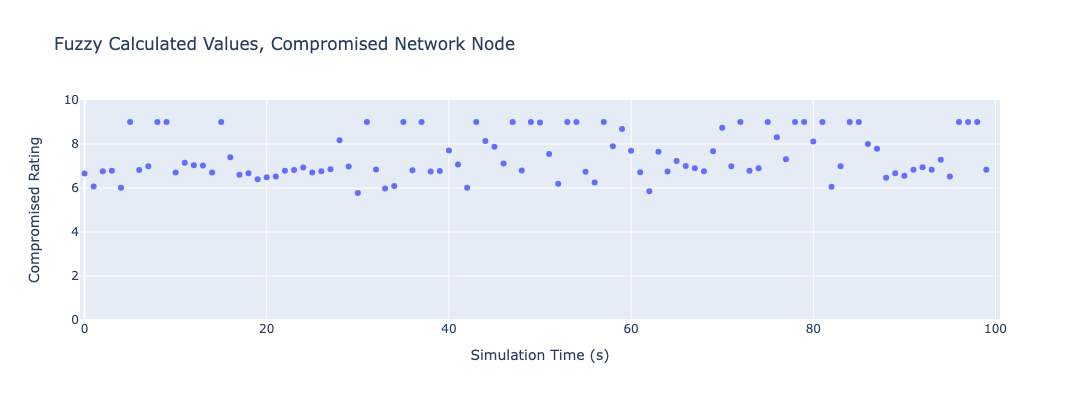

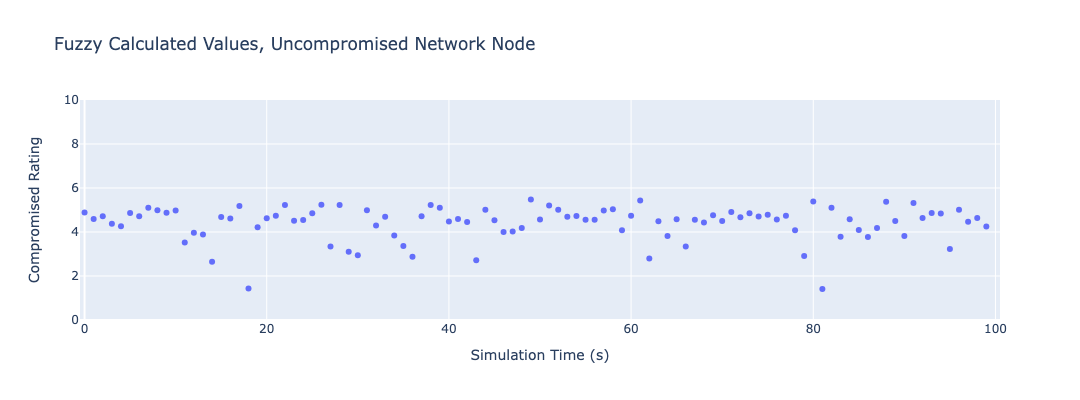

In [18]:
fig1 = px.scatter(df_c, x='time', y='fuzzy_compromised', width=600, height=400, range_y=[0,10], range_x=[-0.5,100.5],
                  title='Fuzzy Calculated Values, Compromised Network Node',
                 labels={'fuzzy_compromised':'Compromised Rating',
                        'time': 'Simulation Time (s)'})
fig2 = px.scatter(df_u, x='time', y='fuzzy_compromised', width=600, height=400, range_y=[0,10], range_x=[-0.5,100.5],
                title='Fuzzy Calculated Values, Uncompromised Network Node',
                 labels={'fuzzy_compromised':'Compromised Rating',
                        'time': 'Simulation Time (s)'})

fig1.show()
fig2.show()